In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [4]:
features, targets = cancer.data, cancer.target
features.shape, targets.shape

((569, 30), (569,))

In [5]:
features.mean(0), features.std(0)

(array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
        9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
        1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
        2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
        3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
        1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
        1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
        2.90075571e-01, 8.39458172e-02]),
 array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
        1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
        2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
        2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
        3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
        4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
        2.28123569e-02

In [6]:
#As we can see here that there are some huge values, we need to bring it down. First, let's see how they look like

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


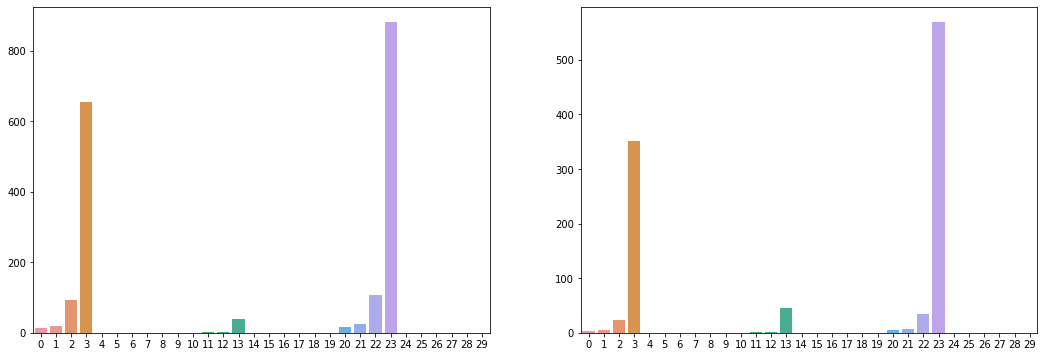

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,6))
sns.barplot(list(range(30)), features.mean(0), ax=ax1)
sns.barplot(list(range(30)), features.std(0), ax=ax2)


In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
features = scalar.fit_transform(features)

In [9]:
features[0], targets[0]

(array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]), 0)

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [12]:
import torch
train_x = torch.from_numpy(X_train).type(torch.float32)
train_y = torch.from_numpy(y_train)
print(train_x.shape)
print(train_y.shape)

torch.Size([455, 30])
torch.Size([455])


In [13]:
dset = list(zip(train_x, train_y))

In [14]:
x,y = dset[0]
x.shape, y

(torch.Size([30]), tensor(1))

In [15]:
from torch.utils.data import DataLoader

In [16]:
dl = DataLoader(dset, batch_size=256)
xb, yb = next(iter(dl))
xb.shape, yb.shape

(torch.Size([256, 30]), torch.Size([256]))

In [17]:
valid_x = torch.from_numpy(X_test).type(torch.float32)
valid_y = torch.from_numpy(y_test)
valid_dset = list(zip(valid_x,valid_y))
valid_dl = DataLoader(valid_dset, batch_size=256)

In [18]:
#Step 1: Initialization

In [19]:
def init_params(size, std=1.0): return (torch.rand(size) * std).requires_grad_()

In [20]:
weights = init_params((30,1)) # as there are 30 features in the sample set

In [21]:
bias = init_params(1)

In [22]:
#general equation of line y = w * x + b where w= weights and b = bias

In [23]:
# Prediction for one sample can be  calculates as follows:
# (train_x[0] * weights.T).sum() + bias

In [24]:
#  We need to do this for all samples in mini batch.Let's create mini batch of size 8
batch = train_x[:8]
batch.shape

torch.Size([8, 30])

In [25]:
def linear1(xb):
  return xb@weights + bias
preds = linear1(batch)
preds

tensor([[18.0073],
        [19.5342],
        [-0.5802],
        [-4.6439],
        [-1.4681],
        [11.3294],
        [15.2371],
        [-8.8465]], grad_fn=<AddBackward0>)

In [26]:
def class_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [27]:
loss = class_loss(preds, train_y[:8])
loss

tensor(0.4653, grad_fn=<MeanBackward0>)

In [28]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = class_loss(preds, yb)
  loss.backward()

In [29]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [30]:
preds

tensor([[18.0073],
        [19.5342],
        [-0.5802],
        [-4.6439],
        [-1.4681],
        [11.3294],
        [15.2371],
        [-8.8465]], grad_fn=<AddBackward0>)

In [31]:
preds.squeeze() > 0.5

tensor([ True,  True, False, False, False,  True,  True, False])

In [32]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [33]:
batch_accuracy(linear1(batch), train_y[:8])

tensor(0.5000)

In [34]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [35]:
validate_epoch(linear1)

0.4849

In [36]:
lr = 0.1
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.4849

In [37]:
for i in range(5):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.4849 0.4849 0.4849 0.4849 0.4849 

In [38]:
from torch import nn
from torch.nn import functional as F

In [39]:
linear_model = nn.Linear(30,1)
linear_model

Linear(in_features=30, out_features=1, bias=True)

In [40]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 30]), torch.Size([1]))

In [41]:
class BasicOptim:
  def __init__(self, params, lr):
    self.params =  list(params)
    self.lr = lr
  
  def  step(self):
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self):
    for p in self.params:
      p.grad = None




In [42]:
opt = BasicOptim(linear_model.parameters(), lr)

In [43]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()


In [44]:
validate_epoch(linear_model)

0.5065

In [45]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end='  ')

In [46]:
train_model(linear_model, 5)

0.5065  0.5086  0.5086  0.5086  0.5086  

In [47]:
#Defining a neural network

In [48]:
def simple_net(xb):
  res = xb@w1 + b1
  print(res)
  res = res.max(tensor(0.0))
  print(res.max(tensor(0.0)))  # It will replace all negative numbers with 0
  res = res@w2 + b2
  return res

In [49]:
w1 = init_params((30,32))
b1 = init_params(32)
w2 = init_params((32,1))
b2 = init_params(1)

In [61]:
simple_net = nn.Sequential(nn.Linear(30,64),
                           nn.ReLU(),
                           nn.Linear(64,38),
                           nn.ReLU(),
                           nn.Linear(38, 16),
                           nn.ReLU(),
                           nn.Linear(16,10),
                           nn.ReLU(),
                           nn.Linear(10,1)
                           )

In [62]:
opt = BasicOptim(simple_net.parameters(), lr)

In [63]:
train_model(simple_net, 20)

0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  0.6228  